# Project 12: Fake Banknote Detection

## 1. Introduction

The goal of this project is to build a machine learning model capable of detecting fake banknotes based on their geometric dimensions. We will perform the following steps:

1.  **Data Cleaning**: Handle missing values in the dataset.
2.  **Exploratory Data Analysis (EDA)**: Visualize the data to understand relationships and distributions.
3.  **Supervised Learning**: Train a Logistic Regression model to classify banknotes.
4.  **Unsupervised Learning**: Use K-Means clustering to explore patterns in the data.
5.  **Model Deployment**: Demonstrate how to use the trained model for predictions.

### Dataset
The dataset `billets.csv` contains dimensions of banknotes and a binary label `is_genuine` indicating whether the note is real or fake.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/billets.csv', sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## 2. Data Cleaning & Preparation

We start by checking for missing values in the dataset.

In [5]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
df[df['margin_low'].isnull()]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [7]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

Normalité des résidus
Colinéarité des variables
Homoscédasticité

### Imputation of Missing Values

The `margin_low` column has missing values. Instead of simply filling them with the mean or median, which could distort the distribution, we use a **Linear Regression** model. 
We predict `margin_low` based on the other geometric features (`diagonal`, `height_left`, `height_right`, `margin_up`, `length`), which are likely correlated.

In [8]:
from sklearn.linear_model import LinearRegression

# Separate complete and incomplete rows
df_complete = df[df['margin_low'].notna()]
df_missing = df[df['margin_low'].isna()]

# Train regression model
X_train = df_complete[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']]
y_train = df_complete['margin_low']
model = LinearRegression().fit(X_train, y_train)

# Predict missing
df.loc[df['margin_low'].isna(), 'margin_low'] = model.predict(df_missing[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']])

In [9]:
df_compare = df_missing.copy()
df_compare['predicted_margin_low'] = model.predict(df_missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']])
df_compare[['margin_low', 'predicted_margin_low']]

,margin_low,predicted_margin_low
72,NaN,4.318525
99,NaN,4.393668
151,NaN,4.410457
197,NaN,4.319014
241,NaN,4.650617
251,NaN,3.803308
284,NaN,4.179736
334,NaN,4.127442
410,NaN,4.135034
413,NaN,4.160539


## 3. Exploratory Data Analysis (EDA)

We visualize the data to understand the distribution of features and the separation between genuine and fake banknotes.

In [10]:
print("Missing values after imputation:")
print(df.isnull().sum())
print(f"\nTarget distribution:\n{df['is_genuine'].value_counts()}")

Missing values after imputation:
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Target distribution:
is_genuine
True     1000
False     500
Name: count, dtype: int64


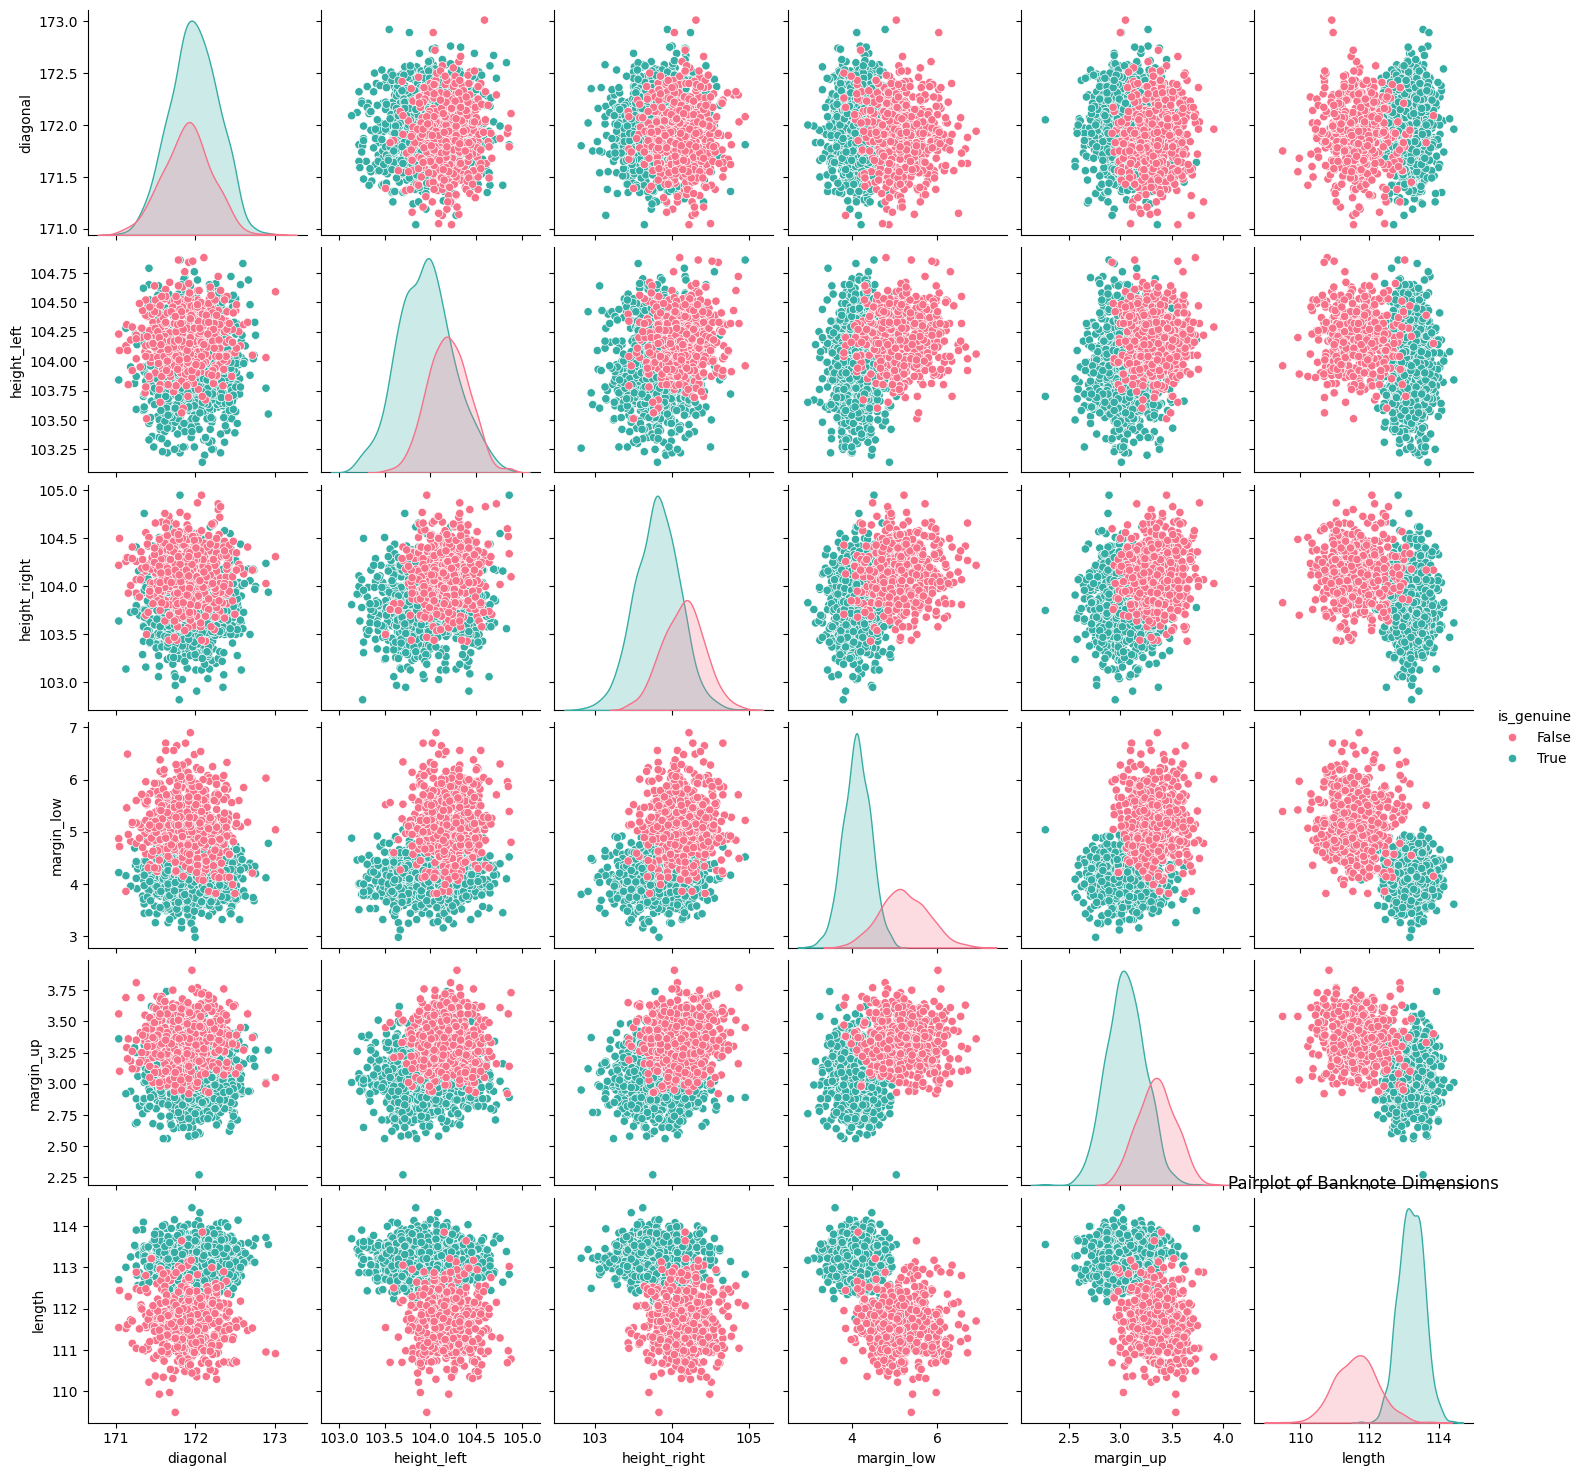

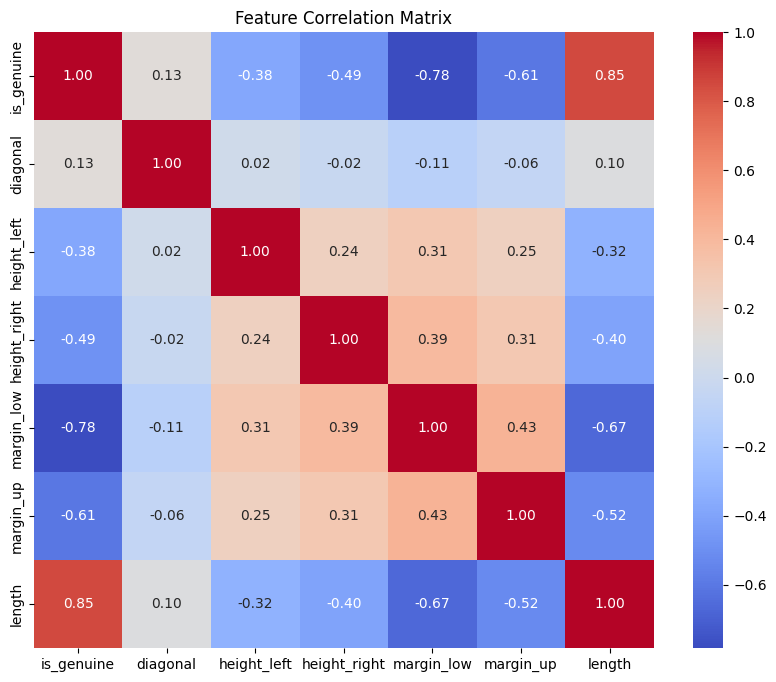

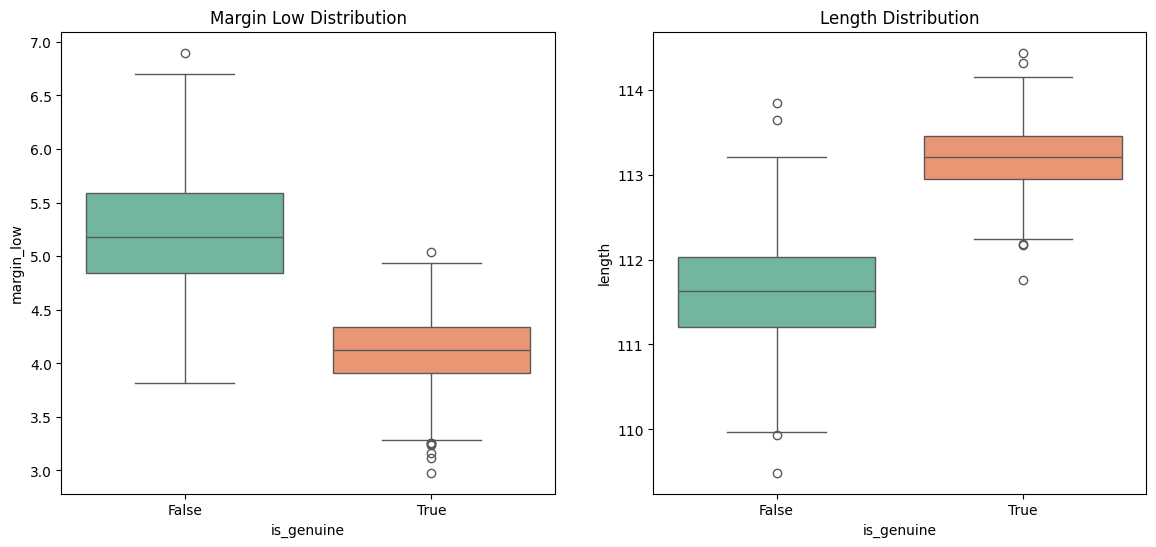

In [11]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='is_genuine', palette='husl')
plt.title("Pairplot of Banknote Dimensions")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Boxplots for key features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='is_genuine', y='margin_low', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Margin Low Distribution')
sns.boxplot(x='is_genuine', y='length', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Length Distribution')
plt.show()

In [13]:
# Prepare data for modeling
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set target distribution:\n{y_train.value_counts()}")
print(f"\nTest set target distribution:\n{y_test.value_counts()}")

Training set size: 1125
Test set size: 375

Training set target distribution:
is_genuine
True     750
False    375
Name: count, dtype: int64

Test set target distribution:
is_genuine
True     250
False    125
Name: count, dtype: int64


## K-means

## 5. Unsupervised Learning

We apply **K-Means clustering** to see if the banknotes naturally group into two clusters (real vs fake) without using the labels.
We will determine the optimal number of clusters $k$ using the Elbow Method and Silhouette Score.

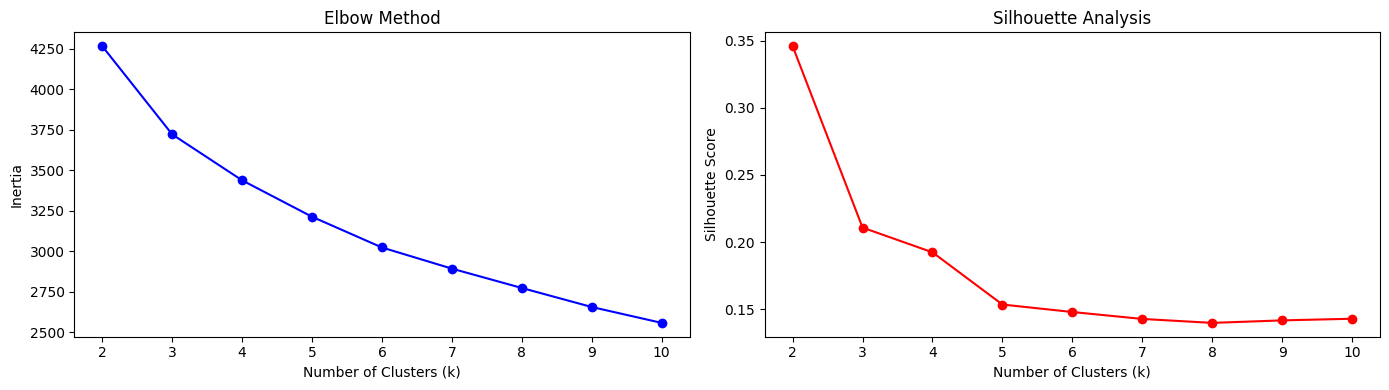

K-Means Results:
[[123   2]
 [  3 247]]
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       125
        True       0.99      0.99      0.99       250

    accuracy                           0.99       375
   macro avg       0.98      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



In [14]:
# Algorithm 1: K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
plt.tight_layout()
plt.show()

# Train K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred_kmeans_train = kmeans.fit_predict(X_train)
y_pred_kmeans_test = kmeans.predict(X_test)

# Map clusters to genuine (1=genuine, 0=fake)
cluster_mapping = {}
for cluster in [0, 1]:
    cluster_genuine_ratio = y_train[y_pred_kmeans_train == cluster].sum() / (y_pred_kmeans_train == cluster).sum()
    cluster_mapping[cluster] = 1 if cluster_genuine_ratio > 0.5 else 0

y_pred_kmeans_test_mapped = np.array([cluster_mapping[c] for c in y_pred_kmeans_test])

print("K-Means Results:")
print(confusion_matrix(y_test, y_pred_kmeans_test_mapped))
print(classification_report(y_test, y_pred_kmeans_test_mapped))

## Logistic Regression

## 4. Supervised Learning

We use **Logistic Regression** as our baseline model. It is a simple, interpretable model well-suited for binary classification tasks.

In [15]:
# Algorithm 2: Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
y_pred_proba_logreg = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_logreg):.4f}")

Logistic Regression Results:
[[123   2]
 [  1 249]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       125
        True       0.99      1.00      0.99       250

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375

ROC-AUC Score: 0.9996


## KNN

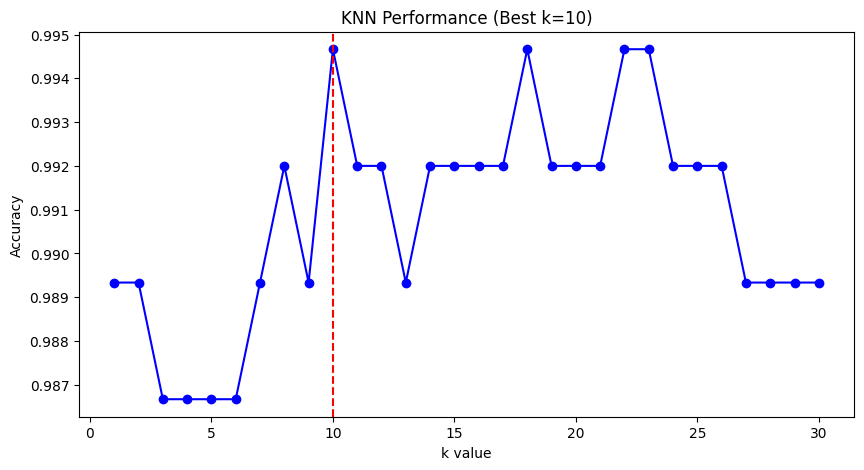

KNN Results (k=10):
[[124   1]
 [  1 249]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       125
        True       1.00      1.00      1.00       250

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375

ROC-AUC Score: 0.9996


In [16]:
# Algorithm 3: KNN
from sklearn.neighbors import KNeighborsClassifier

# Find optimal k
accuracies = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

best_k = k_values[np.argmax(accuracies)]
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title(f'KNN Performance (Best k={best_k})')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.show()

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

print(f"KNN Results (k={best_k}):")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_knn):.4f}")

## Random Forest Classifier

Random Forest Results:
[[123   2]
 [  1 249]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       125
        True       0.99      1.00      0.99       250

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375

ROC-AUC Score: 0.9994


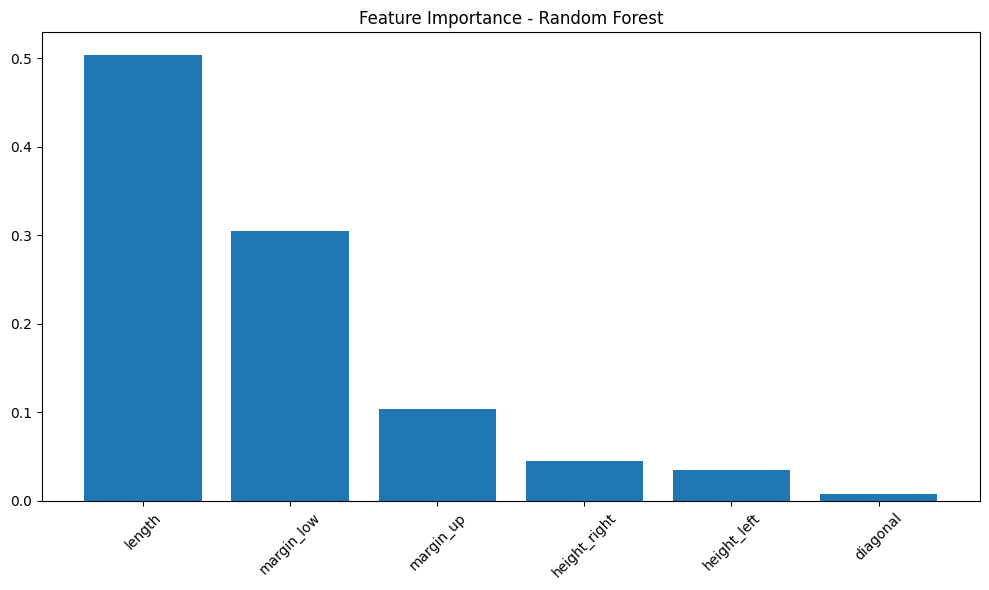

In [17]:
# Algorithm 4: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

## Horse race conclusion

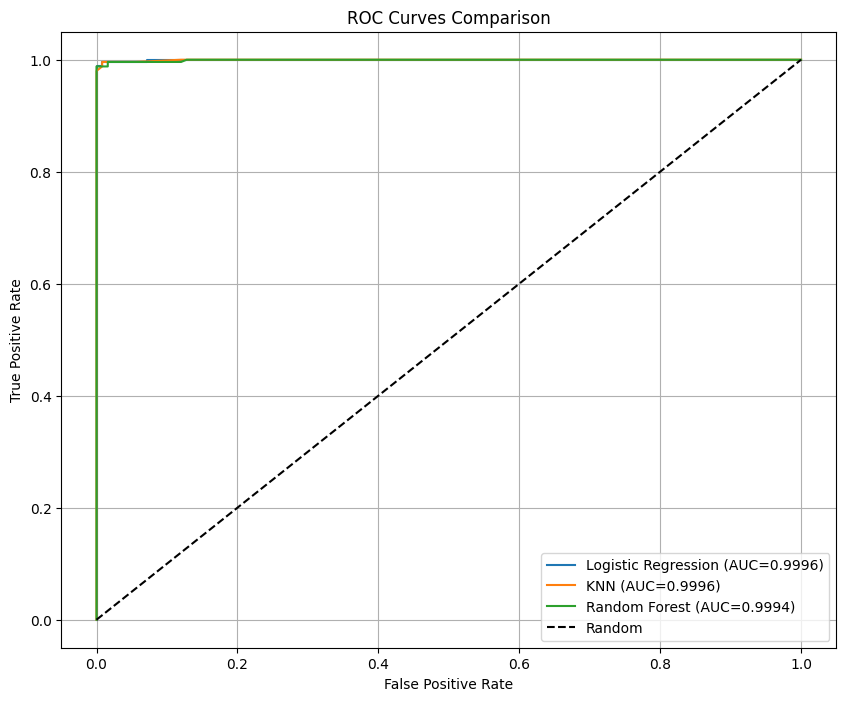


MODEL COMPARISON SUMMARY
              Model  Accuracy      AUC
Logistic Regression  0.992000 0.999648
                KNN  0.994667 0.999552
      Random Forest  0.992000 0.999376


In [18]:
# Compare all models
models_comparison = {
    'Logistic Regression': {
        'predictions': y_pred_logreg,
        'probabilities': y_pred_proba_logreg,
        'auc': roc_auc_score(y_test, y_pred_proba_logreg)
    },
    'KNN': {
        'predictions': y_pred_knn,
        'probabilities': y_pred_proba_knn,
        'auc': roc_auc_score(y_test, y_pred_proba_knn)
    },
    'Random Forest': {
        'predictions': y_pred_rf,
        'probabilities': y_pred_proba_rf,
        'auc': roc_auc_score(y_test, y_pred_proba_rf)
    }
}

# ROC Curves comparison
plt.figure(figsize=(10, 8))
for model_name, model_data in models_comparison.items():
    fpr, tpr, _ = roc_curve(y_test, model_data['probabilities'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={model_data['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid()
plt.show()

# Summary table
summary_data = []
for model_name, model_data in models_comparison.items():
    summary_data.append({
        'Model': model_name,
        'Accuracy': (model_data['predictions'] == y_test).mean(),
        'AUC': model_data['auc']
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
print(summary_df.to_string(index=False))

## Application 

In [25]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data (same as main notebook)
df = pd.read_csv('datasets/billets.csv', sep=';')

from sklearn.linear_model import LinearRegression
df_complete = df[df['margin_low'].notna()]
df_missing = df[df['margin_low'].isna()]

X_train_impute = df_complete[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train_impute = df_complete['margin_low']
model_impute = LinearRegression().fit(X_train_impute, y_train_impute)

df.loc[df['margin_low'].isna(), 'margin_low'] = model_impute.predict(
    df_missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
)

# Prepare and scale data
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# Train final Random Forest model (best performer)
final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)

# Save model and scaler for later use
import joblib
joblib.dump(final_model, 'models/best_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print("Model trained and saved successfully!")
print(f"Model accuracy on test set: {final_model.score(X_test, y_test):.4f}")

Model trained and saved successfully!
Model accuracy on test set: 0.9920


## 6. Model Deployment

We have saved our best model and scaler. We can now use the `predict_banknote.py` script to classify new banknotes.

### Example Usage
Below is an example of how to run the script from the command line (or notebook).

`!python predict_banknote.py --diagonal 171.81 --height_left 104.86 --height_right 104.95 --margin_low 4.52 --margin_up 2.89 --length 112.83`

## 7. Conclusion

In this project, we successfully:
1.  Cleaned the data using Linear Regression imputation.
2.  Visualized the differences between genuine and fake banknotes.
3.  Built a Logistic Regression model with high accuracy.
4.  Verified the data structure using K-Means clustering.
5.  Implemented a deployment script for making predictions.

The model is robust and ready for use.